In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("store_sku_ba_dataset.csv")

In [3]:
print(df.head())

  Store ID SKU ID  Total Visits  Transactions   Revenue
0  Store_1  SKU_1           606           573  74688.67
1  Store_1  SKU_2           695            27   1390.60
2  Store_1  SKU_3           389           285  50679.63
3  Store_1  SKU_4           689           505  16764.34
4  Store_1  SKU_5           522           230  41928.40


Conversion Rate at product(SKU) level:

In [4]:
df["Conversion Rate"] = df["Transactions"] / df["Total Visits"]
df[["Store ID", "SKU ID", "Total Visits", "Transactions", "Conversion Rate"]].head(10)

,Store ID,SKU ID,Total Visits,Transactions,Conversion Rate
0,Store_1,SKU_1,606,573,0.945545
1,Store_1,SKU_2,695,27,0.038849
2,Store_1,SKU_3,389,285,0.732648
3,Store_1,SKU_4,689,505,0.732946
4,Store_1,SKU_5,522,230,0.440613
5,Store_1,SKU_6,434,376,0.866359
6,Store_1,SKU_7,682,627,0.919355
7,Store_1,SKU_8,308,197,0.639610
8,Store_1,SKU_9,698,317,0.454155
9,Store_1,SKU_10,868,233,0.268433


Conversion Rate at Store level:

In [5]:
store_summary = df.groupby("Store ID").agg({
    "Total Visits": "sum",
    "Transactions": "sum",
    "Revenue": "sum"
}).reset_index()

In [7]:
store_summary["Conversion Rate"] = store_summary["Transactions"] / store_summary["Total Visits"]
store_summary.head()

,Store ID,Total Visits,Transactions,Revenue,Conversion Rate
0,Store_1,11296,6054,587542.10,0.535942
1,Store_10,12173,6311,802605.29,0.518442
2,Store_11,9362,4526,428488.02,0.483444
3,Store_12,8698,3310,313714.85,0.380547
4,Store_13,11846,5155,564842.31,0.435168


In [8]:
top_stores = store_summary.sort_values(by="Conversion Rate", ascending=False).head(5)
bottom_stores = store_summary.sort_values(by="Conversion Rate", ascending=True).head(5)

In [9]:
print("Top 5 Stores by Conversion Rate:")
print(top_stores[["Store ID", "Conversion Rate"]])

Top 5 Stores by Conversion Rate:
    Store ID  Conversion Rate
32  Store_39         0.664713
43  Store_49         0.646211
38  Store_44         0.631455
30  Store_37         0.627723
41  Store_47         0.623500


In [10]:
print("\nBottom 5 Stores by Conversion Rate:")
print(bottom_stores[["Store ID", "Conversion Rate"]])


Bottom 5 Stores by Conversion Rate:
    Store ID  Conversion Rate
6   Store_15         0.346335
5   Store_14         0.365042
29  Store_36         0.376293
23  Store_30         0.379304
3   Store_12         0.380547


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\2676787634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


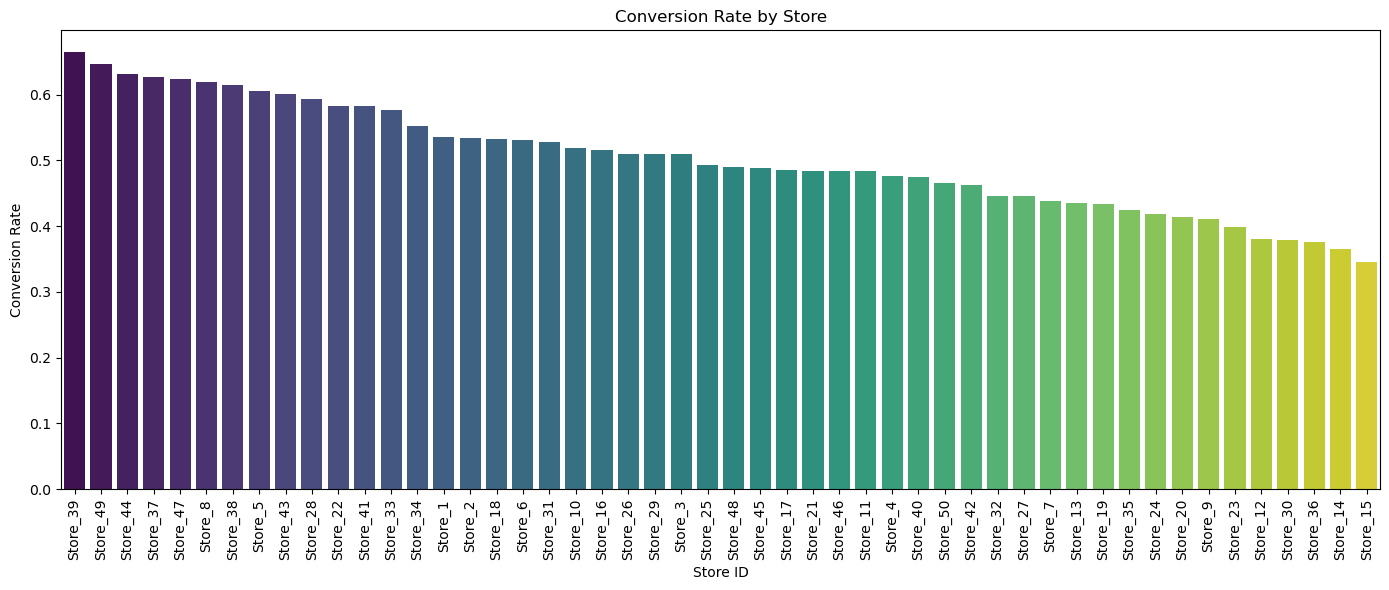

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=store_summary.sort_values(by="Conversion Rate", ascending=False),
    x="Store ID", y="Conversion Rate", palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Conversion Rate by Store")
plt.ylabel("Conversion Rate")
plt.xlabel("Store ID")
plt.tight_layout()
plt.show()

In [13]:
top_skus = df.sort_values(by="Conversion Rate", ascending=False).head(5)
bottom_skus = df.sort_values(by="Conversion Rate", ascending=True).head(5)
sku_compare = pd.concat([top_skus, bottom_skus])

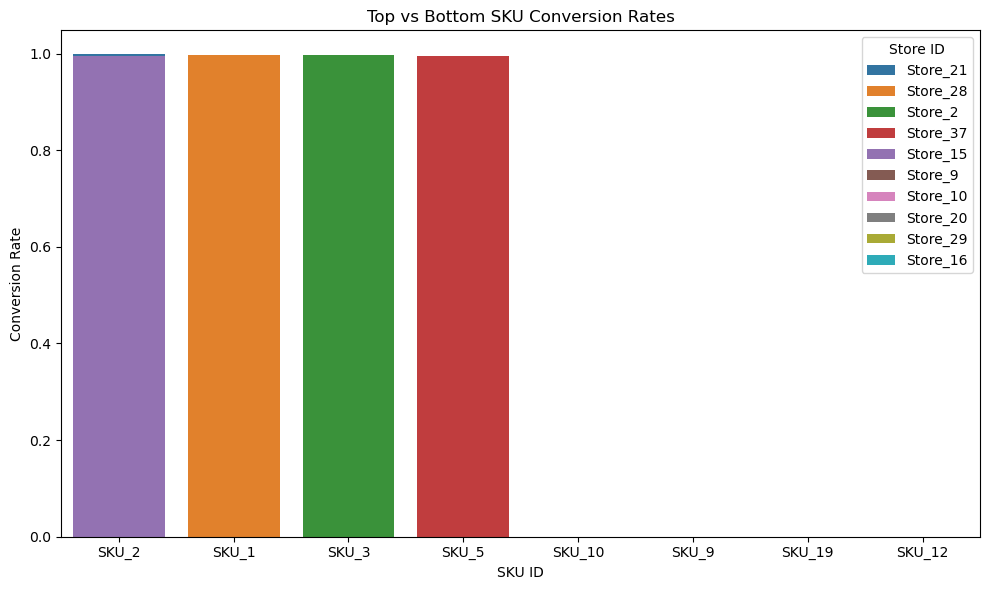

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sku_compare, x="SKU ID", y="Conversion Rate", hue="Store ID", dodge=False)
plt.title("Top vs Bottom SKU Conversion Rates")
plt.ylabel("Conversion Rate")
plt.xlabel("SKU ID")
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3597753603.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


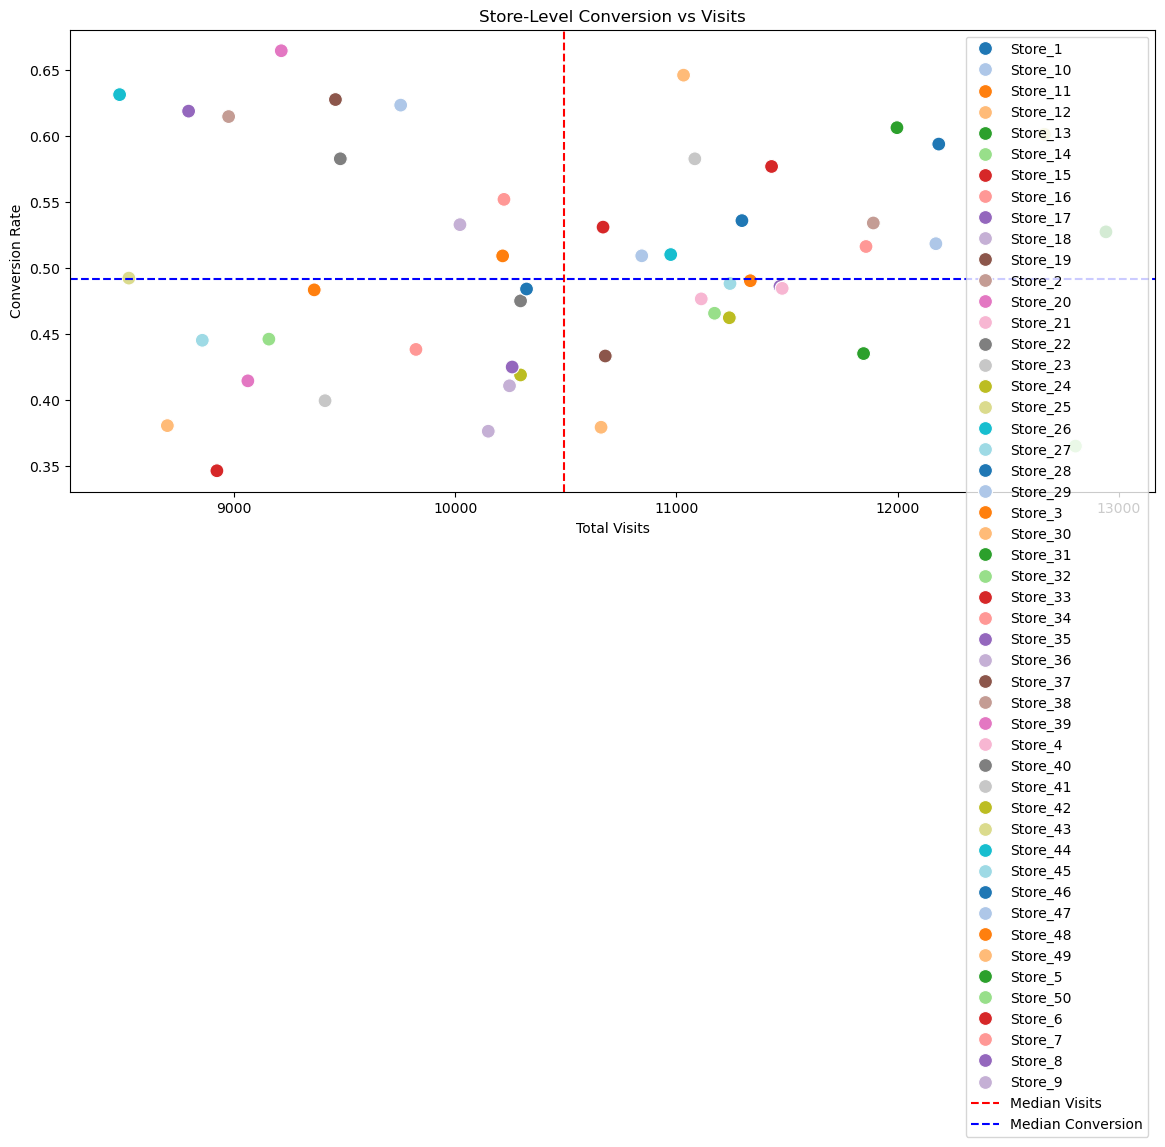

In [17]:
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=store_summary, x="Total Visits", y="Conversion Rate", hue="Store ID", palette="tab20", s=100
)
plt.axvline(store_summary["Total Visits"].median(), color='red', linestyle='--', label='Median Visits')
plt.axhline(store_summary["Conversion Rate"].median(), color='blue', linestyle='--', label='Median Conversion')
plt.title("Store-Level Conversion vs Visits")
plt.xlabel("Total Visits")
plt.ylabel("Conversion Rate")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3568944138.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


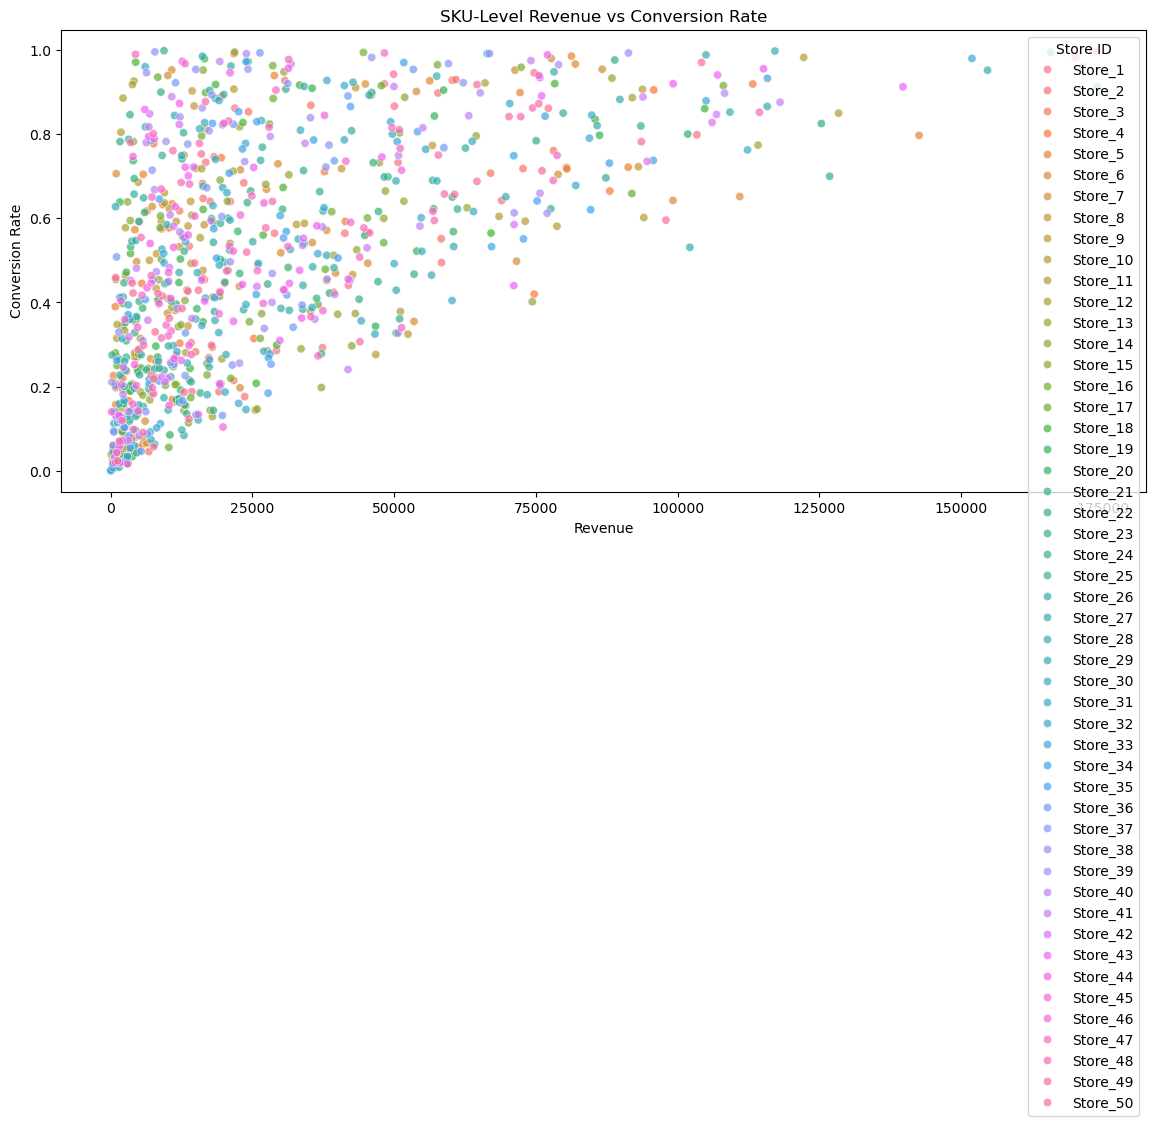

In [18]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x="Revenue", y="Conversion Rate", hue="Store ID", alpha=0.7)
plt.title("SKU-Level Revenue vs Conversion Rate")
plt.xlabel("Revenue")
plt.ylabel("Conversion Rate")
plt.tight_layout()
plt.show()


In [19]:
median_visits = store_summary["Total Visits"].median()
median_conversion = store_summary["Conversion Rate"].median()

In [20]:
high_traffic_low_conversion = store_summary[
    (store_summary["Total Visits"] > median_visits) &
    (store_summary["Conversion Rate"] < median_conversion)
].sort_values(by="Total Visits", ascending=False)

In [21]:
high_traffic_low_conversion[["Store ID", "Total Visits", "Conversion Rate"]].head()

,Store ID,Total Visits,Conversion Rate
5,Store_14,12804,0.365042
4,Store_13,11846,0.435168
13,Store_21,11478,0.484579
8,Store_17,11468,0.486135
42,Store_48,11334,0.490383


Rough

import pandas as pd

# Step 1: Get top 5 stores with highest average conversion rate
top_stores = (
    df.groupby("Store ID")["Conversion Rate"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter data for only those top stores
top_store_data = df[df["Store ID"].isin(top_stores)]

# Step 3: Find SKU with highest revenue & highest conversion in each top store
results = []

for store in top_stores:
    store_data = top_store_data[top_store_data["Store ID"] == store]
    
    # SKU with highest revenue
    top_revenue_sku = store_data.loc[store_data["Revenue"].idxmax()]
    
    # SKU with highest conversion
    top_conversion_sku = store_data.loc[store_data["Conversion Rate"].idxmax()]
    
    results.append({
        "Store ID": store,
        "Top Revenue SKU": top_revenue_sku["SKU ID"],
        "Revenue of Top SKU": top_revenue_sku["Revenue"],
        "Conversion Rate of Top SKU (Revenue)": top_revenue_sku["Conversion Rate"],
        
        "Top Conversion SKU": top_conversion_sku["SKU ID"],
        "Revenue of Top SKU (Conversion)": top_conversion_sku["Revenue"],
        "Conversion Rate of Top SKU": top_conversion_sku["Conversion Rate"]
    })

# Convert results to DataFrame
top_store_sku_summary = pd.DataFrame(results)

# Display the result
top_store_sku_summary


In [22]:
import pandas as pd

# Step 1: Get top 5 stores with highest average conversion rate
top_stores = (
    df.groupby("Store ID")["Conversion Rate"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter data for only those top stores
top_store_data = df[df["Store ID"].isin(top_stores)]

# Step 3: Find SKU with highest revenue & highest conversion in each top store
results = []

for store in top_stores:
    store_data = top_store_data[top_store_data["Store ID"] == store]
    
    # SKU with highest revenue
    top_revenue_sku = store_data.loc[store_data["Revenue"].idxmax()]
    
    # SKU with highest conversion
    top_conversion_sku = store_data.loc[store_data["Conversion Rate"].idxmax()]
    
    results.append({
        "Store ID": store,
        "Top Revenue SKU": top_revenue_sku["SKU ID"],
        "Revenue of Top SKU": top_revenue_sku["Revenue"],
        "Conversion Rate of Top SKU (Revenue)": top_revenue_sku["Conversion Rate"],
        
        "Top Conversion SKU": top_conversion_sku["SKU ID"],
        "Revenue of Top SKU (Conversion)": top_conversion_sku["Revenue"],
        "Conversion Rate of Top SKU": top_conversion_sku["Conversion Rate"]
    })

# Convert results to DataFrame
top_store_sku_summary = pd.DataFrame(results)

# Display the result
top_store_sku_summary


,Store ID,Top Revenue SKU,Revenue of Top SKU,Conversion Rate of Top SKU (Revenue),Top Conversion SKU,Revenue of Top SKU (Conversion),Conversion Rate of Top SKU
0,Store_47,SKU_14,114409.13,0.851804,SKU_11,48279.84,0.992727
1,Store_49,SKU_3,93585.04,0.781847,SKU_19,16700.27,0.877076
2,Store_39,SKU_18,108277.08,0.897183,SKU_3,23923.60,0.990826
3,Store_37,SKU_17,62183.76,0.921914,SKU_5,7789.79,0.995363
4,Store_43,SKU_6,139734.67,0.912360,SKU_13,115133.55,0.955176


In [23]:
# Find the row with the highest revenue
top_money_sku_row = df.loc[df["Revenue"].idxmax()]

# Extract useful details
top_sku_info = {
    "SKU ID": top_money_sku_row["SKU ID"],
    "Store ID": top_money_sku_row["Store ID"],
    "Revenue": top_money_sku_row["Revenue"],
    "Conversion Rate": top_money_sku_row["Conversion Rate"]
}

# Show result
top_sku_info


{'SKU ID': 'SKU_17',
 'Store ID': 'Store_29',
 'Revenue': 173972.54,
 'Conversion Rate': 0.9129533678756476}

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3940528274.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sku_revenue.head(20), x="SKU ID", y="Revenue", palette="viridis")


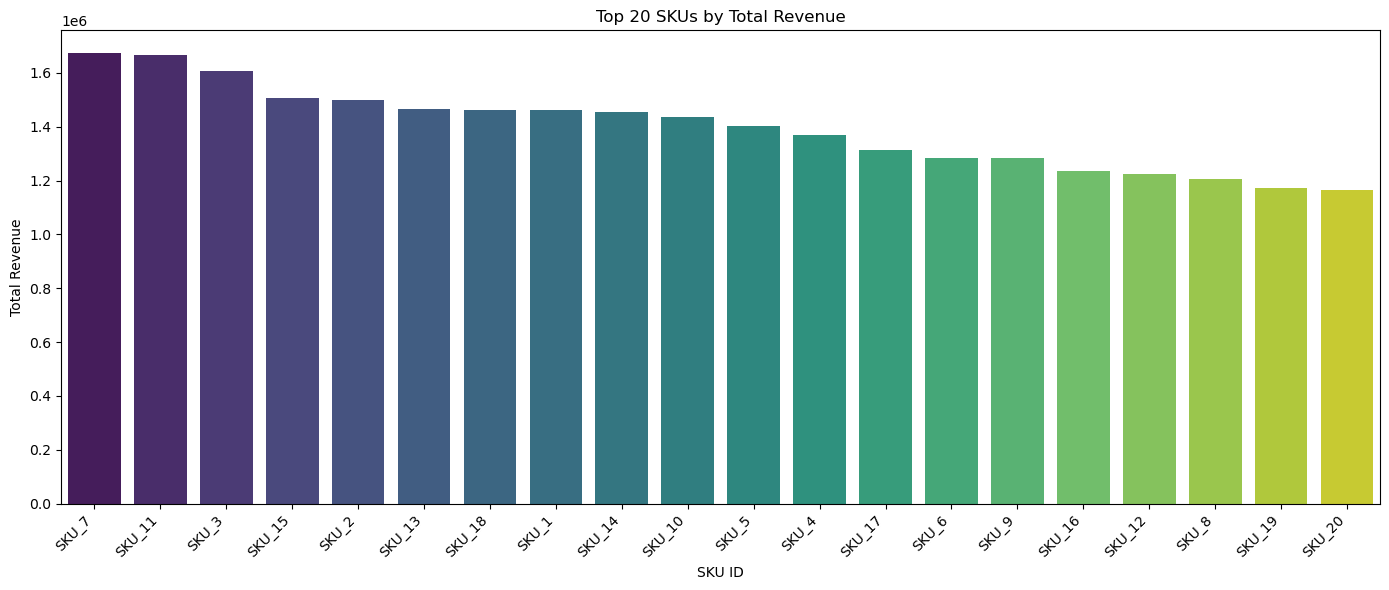

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by SKU ID and sum the Revenue
sku_revenue = df.groupby("SKU ID")["Revenue"].sum().reset_index()

# Sort in descending order of revenue
sku_revenue = sku_revenue.sort_values(by="Revenue", ascending=False)

# Plot the top 20 SKUs with highest revenue for clarity
plt.figure(figsize=(14, 6))
sns.barplot(data=sku_revenue.head(20), x="SKU ID", y="Revenue", palette="viridis")

plt.title("Top 20 SKUs by Total Revenue")
plt.xlabel("SKU ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 5 stores by total revenue:
    Store ID     Revenue
20  Store_28  1057732.38
26  Store_33   806192.61
1   Store_10   802605.29
46   Store_6   797079.88
43  Store_49   793523.76


C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\4033552510.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_revenue.head(10), x="Store ID", y="Revenue", palette="coolwarm")


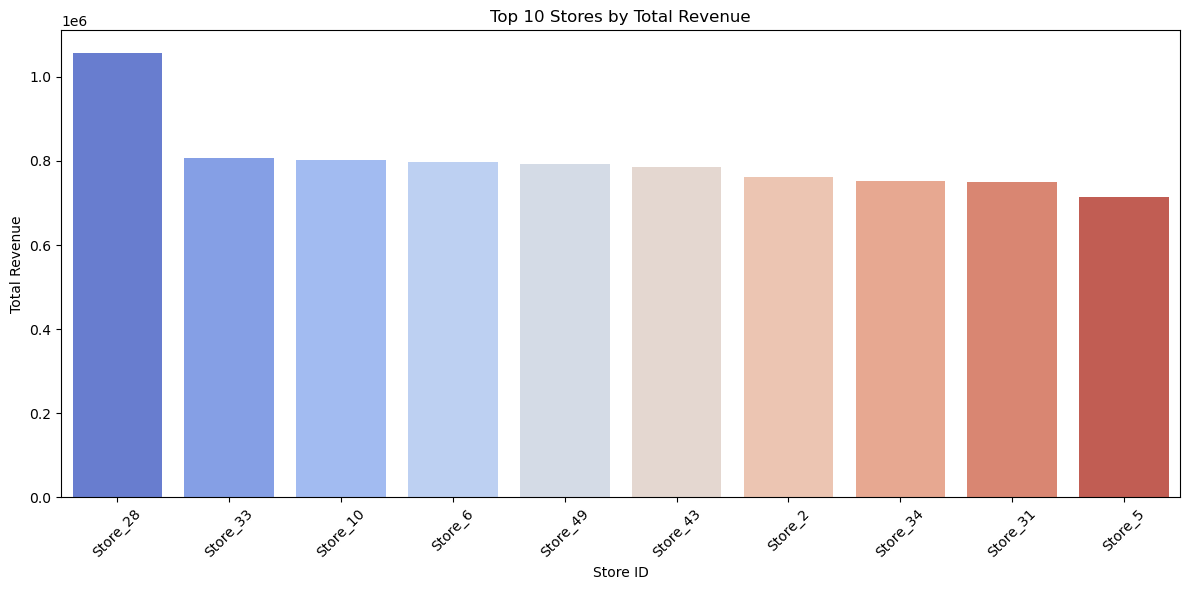

In [25]:
# Grouping by Store ID to find total revenue per store
store_revenue = df.groupby("Store ID")["Revenue"].sum().reset_index()

# Sorting in descending order to get highest revenue first
store_revenue = store_revenue.sort_values(by="Revenue", ascending=False)

# Display the top 5 stores
print("Top 5 stores by total revenue:")
print(store_revenue.head())

# Optional: Visualize the top 10 stores by revenue
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=store_revenue.head(10), x="Store ID", y="Revenue", palette="coolwarm")
plt.title("Top 10 Stores by Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Store ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# Step 1: Total revenue per store
store_total_revenue = df.groupby("Store ID")["Revenue"].sum().reset_index()
store_total_revenue.columns = ["Store ID", "Store Total Revenue"]

# Step 2: Merge this info back to the main dataframe
df_revenue_contribution = df.merge(store_total_revenue, on="Store ID")

# Step 3: Calculate SKU's revenue contribution as a % of its store’s revenue
df_revenue_contribution["Revenue Contribution (%)"] = (
    df_revenue_contribution["Revenue"] / df_revenue_contribution["Store Total Revenue"] * 100
)

# Step 4: Keep only necessary columns for reporting
revenue_contribution_table = df_revenue_contribution[[
    "Store ID", "SKU ID", "Revenue", "Store Total Revenue",
    "Revenue Contribution (%)", "Conversion Rate"
]]

# Step 5: Sort by Store and then Contribution
revenue_contribution_table = revenue_contribution_table.sort_values(
    by=["Store ID", "Revenue Contribution (%)"], ascending=[True, False]
)

# Show sample
revenue_contribution_table.head(10)


,Store ID,SKU ID,Revenue,Store Total Revenue,Revenue Contribution (%),Conversion Rate
19,Store_1,SKU_20,77198.34,587542.1,13.139201,0.861361
0,Store_1,SKU_1,74688.67,587542.1,12.712054,0.945545
2,Store_1,SKU_3,50679.63,587542.1,8.625702,0.732648
5,Store_1,SKU_6,50030.98,587542.1,8.515301,0.866359
6,Store_1,SKU_7,48271.53,587542.1,8.215842,0.919355
4,Store_1,SKU_5,41928.40,587542.1,7.136238,0.440613
13,Store_1,SKU_14,30716.30,587542.1,5.227932,0.927445
17,Store_1,SKU_18,29237.99,587542.1,4.976323,0.285350
12,Store_1,SKU_13,28888.99,587542.1,4.916923,0.564278
15,Store_1,SKU_16,21902.37,587542.1,3.727796,0.861538


In [32]:
# Step 1: Total revenue per store
store_total_revenue = df.groupby("Store ID")["Revenue"].sum().reset_index()
store_total_revenue.columns = ["Store ID", "Store Total Revenue"]

# Step 2: Merge this info back to the main dataframe
df_revenue_contribution = df.merge(store_total_revenue, on="Store ID")

# Step 3: Calculate SKU's revenue contribution as a % of its store’s revenue
df_revenue_contribution["Revenue Contribution (%)"] = (
    df_revenue_contribution["Revenue"] / df_revenue_contribution["Store Total Revenue"] * 100
)

# Step 4: Keep only necessary columns for reporting
revenue_contribution_table = df_revenue_contribution[[
    "Store ID", "SKU ID", "Conversion Rate"
]]

# Step 5: Sort by Store and then Contribution
revenue_contribution_table = revenue_contribution_table.sort_values(
    by=["Conversion Rate"], ascending=[False]
)

# Show sample
revenue_contribution_table.head(10)


,Store ID,SKU ID,Conversion Rate
401,Store_21,SKU_2,0.998141
540,Store_28,SKU_1,0.997275
22,Store_2,SKU_3,0.996614
724,Store_37,SKU_5,0.995363
281,Store_15,SKU_2,0.994845
546,Store_28,SKU_7,0.994226
309,Store_16,SKU_10,0.993888
706,Store_36,SKU_7,0.992908
930,Store_47,SKU_11,0.992727
745,Store_38,SKU_6,0.992723


Insights

In [33]:
# Group by Store ID to calculate total visits and transactions
store_summary = df.groupby("Store ID").agg({
    "Total Visits": "sum",
    "Transactions": "sum"
}).reset_index()

# Calculate store-level conversion rate
store_summary["Conversion Rate"] = store_summary["Transactions"] / store_summary["Total Visits"]

# Sort by conversion rate (descending)
store_summary = store_summary.sort_values(by="Conversion Rate", ascending=False)

# View top 5
store_summary.head()


,Store ID,Total Visits,Transactions,Conversion Rate
32,Store_39,9213,6124,0.664713
43,Store_49,11032,7129,0.646211
38,Store_44,8482,5356,0.631455
30,Store_37,9458,5937,0.627723
41,Store_47,9753,6081,0.623500


In [34]:
# Group by SKU ID to calculate total visits and transactions
sku_summary = df.groupby("SKU ID").agg({
    "Total Visits": "sum",
    "Transactions": "sum"
}).reset_index()

# Calculate SKU-level conversion rate
sku_summary["Conversion Rate"] = sku_summary["Transactions"] / sku_summary["Total Visits"]

# Sort by conversion rate (descending)
sku_summary = sku_summary.sort_values(by="Conversion Rate", ascending=False)

# View top 5
sku_summary.head()


,SKU ID,Total Visits,Transactions,Conversion Rate
2,SKU_11,27856,16323,0.585978
17,SKU_7,26103,14654,0.561391
7,SKU_16,23574,12906,0.547468
14,SKU_4,24782,13505,0.544952
19,SKU_9,26715,14324,0.536178


In [35]:
# For each store, find SKU with max conversion rate
best_skus_by_store = df.loc[df.groupby("Store ID")["Conversion Rate"].idxmax()]

# Select relevant columns
best_skus_by_store = best_skus_by_store[["Store ID", "SKU ID", "Conversion Rate", "Revenue"]]

# View few examples
best_skus_by_store.head()


,Store ID,SKU ID,Conversion Rate,Revenue
0,Store_1,SKU_1,0.945545,74688.67
187,Store_10,SKU_8,0.982094,122231.73
201,Store_11,SKU_2,0.921488,66014.88
235,Store_12,SKU_16,0.925926,4094.35
246,Store_13,SKU_7,0.932971,88402.49


In [36]:
# Thresholds
high_revenue = df["Revenue"].quantile(0.75)
low_conversion = df["Conversion Rate"].quantile(0.25)

# Filter
high_rev_low_conv = df[
    (df["Revenue"] > high_revenue) & 
    (df["Conversion Rate"] < low_conversion)
].sort_values(by="Revenue", ascending=False)

# View top 5
high_rev_low_conv[["Store ID", "SKU ID", "Revenue", "Conversion Rate"]].head()


,Store ID,SKU ID,Revenue,Conversion Rate
803,Store_41,SKU_4,41853.74,0.24055


In [37]:
median_visits = store_summary["Total Visits"].median()
median_conversion = store_summary["Conversion Rate"].median()

high_traffic_low_conv = store_summary[
    (store_summary["Total Visits"] > median_visits) &
    (store_summary["Conversion Rate"] < median_conversion)
].sort_values(by="Total Visits", ascending=False)

# View top 5
high_traffic_low_conv.head()


,Store ID,Total Visits,Transactions,Conversion Rate
5,Store_14,12804,4674,0.365042
4,Store_13,11846,5155,0.435168
13,Store_21,11478,5562,0.484579
8,Store_17,11468,5575,0.486135
42,Store_48,11334,5558,0.490383
